# Galton Machine

In the lectures, we discussed the central limit theorem. A Galton machine is as a simple demonstration of how this works using simulated events. The machine works as follows. 

There's a board with rows of pins with collection buckets (bins) at the bottom. A marble is dropped into the top of the board and left to fall to the bottom. When the marble encounters a pin it will either get deflected one spot to the left or one to the right. Finally when the marble leaves the board at the bottom, it will land in one of the buckets and the position of the bucket that it lands in is recorded. The figure below shows the setup. 

![GaltonMachine](figs/galton_image.png)

The code below simulates this process and counts the number of marbles that landed in each position. In this code, we record the "normalised position" which is just the position divided by the square root of the number of layers, and we bin that in a histogram.

<IPython.core.display.Javascript object>


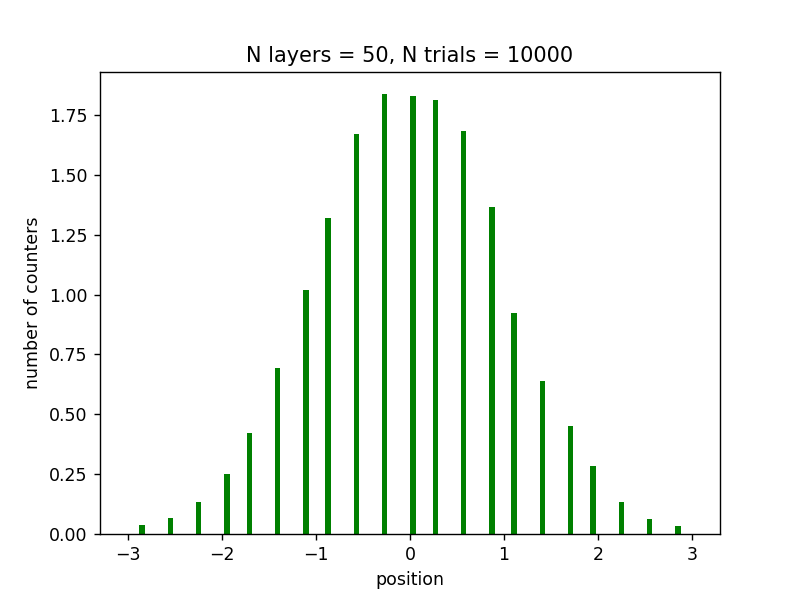

In [1]:
%matplotlib notebook

import numpy
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})

# 50-50 probability to go left or right
def galton_step(x):
 r = numpy.random.uniform(0,1)
 if r < 0.5: return x-1
 else: return x+1

n_layers = 50
n_trials = 10000

finish=[]

for i in range(n_trials):
  start=0
  for j in range(n_layers): start = galton_step(start)
  # normalise the position 
  start /=  numpy.math.sqrt(n_layers)
  finish.append(start)


plt.hist(finish,100,(-3,3),density=True,color='green')
plt.xlabel("position")
plt.ylabel("number of counters")
plt.title("N layers = %d, N trials = %d"%(n_layers, n_trials))
plt.show()

If you think about the distribution of "position", its simly a sum over $X_i$ where $X_i=-1$ or $X_i=+1$ with 50:50 probability. The distribution of each random variable $X_i$ is identical - a uniform distribution in the set $\left\{-1,1\right\}$. The normalised position $P_{N}$ is then given by, 

$$
P_{N} = \frac{1}{\sqrt{N}} \sum_{i} X_{i}.
$$

The mean of each distribution of $X_{i}$ is 0, and the variance is $(-1)^2\times \frac{1}{2} + (1)^2\times \frac{1}{2}=1$. The quantity we saw in lectures, 

$$
T_{N} = \frac{\bar{X}N - \sum_{i}\mu_{1}^{i}}{\sqrt{\sum_{i}v^i_2}} = \frac{\frac{N}{N}\sum_{i}X_{i} - 0 }{\sqrt{N}} = P_{N}
$$

So of course as $N\rightarrow+\infty$ we know from the CLT that $P_{N}$ will be distributed as $\phi(0,1)$

Try increasing the number of layers `n_layers`. The larger it is, the more normal it will be.